In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os

In [72]:
print('',os.stat('../autosaves/RIO_1-25.txt').st_size)
print(os.stat('../autosaves/RIO_rest.txt').st_size)

 12527348
126193740


In [73]:
def data_to_df(data): # function for rio data
    soup = BeautifulSoup(data)
    df = pd.DataFrame()
    failed = 0
    for listing in soup.find_all('div', {'class':'card-container'}):
        try:
            new_row = {'price': ' '.join(listing.find('p',
                                    {'class':'simple-card__price'}).text.split()),
                       'address': listing.find('p',
                                    {'class': 'simple-card__address'}).text,}
                       
            new_row.update({f'price-item-{i}':' '.join(value.text.split()) for i, value in
                            enumerate(listing.find_all('li', {'class': 'card-price__item'}))})
            
            
            new_row.update({''.join([c[3:] for c in feature.attrs['class'] if 'js-' in c]):
                             feature.text.strip() for feature in
                             listing.find_all('li', {'class':'feature__item'})})
            df = df.append(new_row, ignore_index=True)
        except:
            failed +=1
    return df

---
# Rio
### data from zapimoveis.com.br:

In [74]:
with open('../autosaves/RIO_1-25.txt') as d:
    data = [page+'/html>' for page in d.read().split('/html>')[:-1]]
len(data)

29

In [75]:
with open('../autosaves/RIO_rest.txt') as d:
    data += [page+'/html>' for page in d.read().split('/html>')[:-1]]
len(data)

323

In [80]:
accepted = 0
discarded = 0
rio_rents = pd.DataFrame()
for i in range(len(data)):
    df = data_to_df(data[i])
    if len(df)==0: discarded += 1
    else: accepted+=1
    rio_rents = pd.concat([rio_rents, df], sort=False)
    if i%10==0: print(accepted, 'pages added |', discarded, 'discarded')
    
print(strange_pages, 'strange pages.', len(data)-strange_pages, 'pages added.')
rio_rents

1 pages added | 0 discarded
10 pages added | 1 discarded
17 pages added | 4 discarded
27 pages added | 4 discarded
36 pages added | 5 discarded
44 pages added | 7 discarded
53 pages added | 8 discarded
62 pages added | 9 discarded
71 pages added | 10 discarded
77 pages added | 14 discarded
87 pages added | 14 discarded
96 pages added | 15 discarded
104 pages added | 17 discarded
114 pages added | 17 discarded
122 pages added | 19 discarded
131 pages added | 20 discarded
140 pages added | 21 discarded
148 pages added | 23 discarded
158 pages added | 23 discarded
166 pages added | 25 discarded
175 pages added | 26 discarded
184 pages added | 27 discarded
192 pages added | 29 discarded
200 pages added | 31 discarded
210 pages added | 31 discarded
219 pages added | 32 discarded
228 pages added | 33 discarded
238 pages added | 33 discarded
248 pages added | 33 discarded
256 pages added | 35 discarded
265 pages added | 36 discarded
274 pages added | 37 discarded
282 pages added | 39 discarde

,address,areas,bathrooms,bedrooms,parking-spaces,price,price-item-0,price-item-1,
0,"Rua João Barros Moreira, Recreio dos Bandeirantes",450 m²,7,4,3,R$ 5.000 /mês,condomínio R$ 1.242,IPTU R$ 481,NaN
1,"Rua João Pinheiro, Piedade",56 m²,2,2,1,R$ 1.300 /mês,condomínio R$ 460,IPTU R$ 60,NaN
2,"Estrada dos Bandeirantes, Jacarepaguá",61 m²,2,2,1,R$ 1.380 /mês,condomínio R$ 600,IPTU R$ 89,NaN
3,"Rua Mário Covas Júnior, Barra da Tijuca",97 m²,3,2,1,R$ 2.950 /mês,condomínio R$ 852,IPTU R$ 315,NaN
4,"Rua Coronel Paulo Malta Rezende, Barra da Tijuca",65 m²,2,2,1,R$ 2.400 /mês,condomínio R$ 809,IPTU R$ 218,NaN
...,...,...,...,...,...,...,...,...,...
31,"Rua Getúlio, Todos os Santos",68 m²,2,3,1,R$ 1.050 /mês,condomínio R$ 800,IPTU R$ 58,NaN
32,"Avenida Lúcio Costa, Barra da Tijuca",290 m²,5,4,3,R$ 18.000 /mês,condomínio R$ 5.400,IPTU R$ 2.600,NaN
33,"Rua Santa Alexandrina, Rio Comprido",58 m²,1,1,NaN,R$ 1.200 /mês,condomínio R$ 566,IPTU R$ 15,NaN
34,"Boulevard Vinte e Oito de Setembro, Vila Isabel",110 m²,2,3,NaN,R$ 1.900 /mês,condomínio R$ 998,IPTU R$ 1.400,NaN


In [82]:
print(rio_rents.shape)
print(f"-{sum(rio_rents.duplicated())} duplicates")
rio_rents.drop_duplicates(inplace=True)
print(rio_rents.shape)

(10005, 9)
-2325 duplicates
(7680, 9)


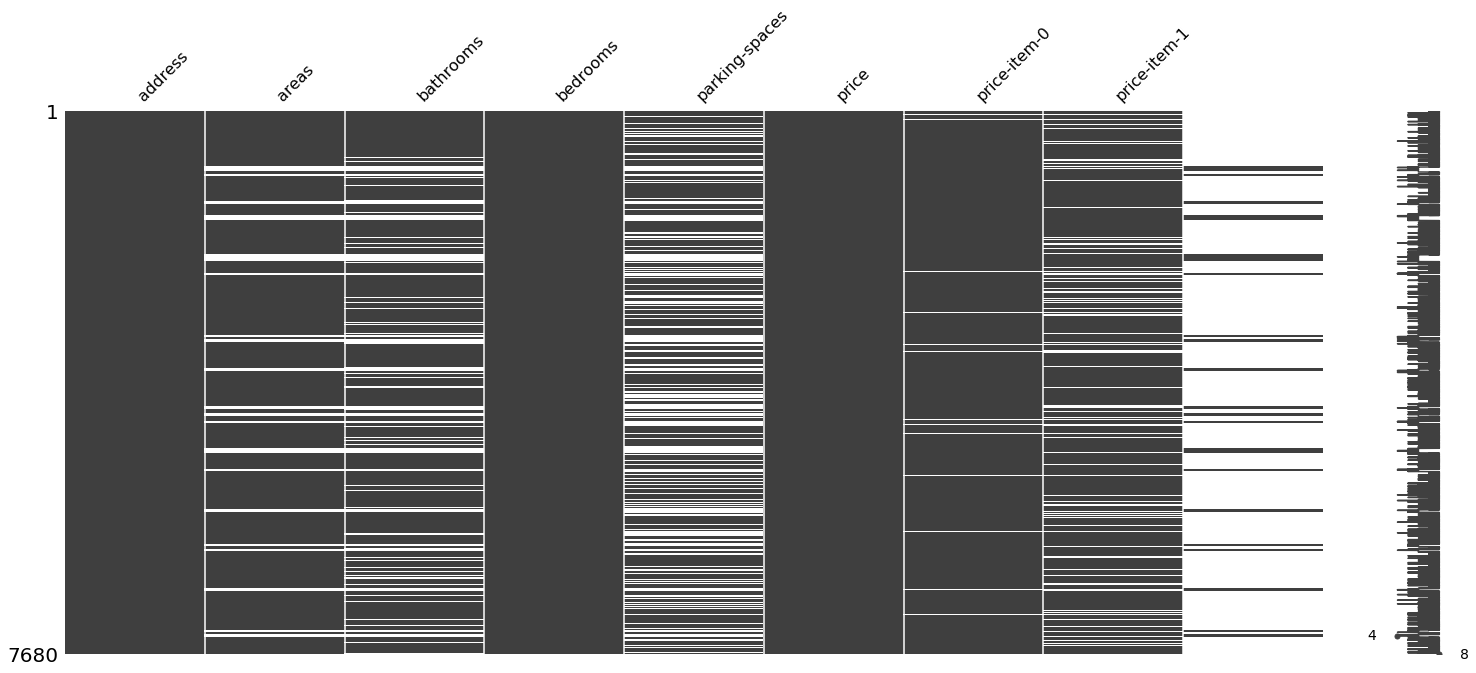

In [85]:
import missingno as mno

mno.matrix(rio_rents)

In [84]:
rio_rents.to_csv('rio_de_janeiro_data.csv')